In [58]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [59]:
start = datetime.datetime(2011,1,1)
end = datetime.datetime(2021,1,1)

In [60]:
tesla = web.DataReader('TSLA', 'yahoo',start,end)
ford = web.DataReader('F', 'yahoo',start,end)
gm = web.DataReader('GM', 'yahoo',start,end)

In [61]:
#plt.plot( google['Open'],label = 'GOOGL open prices')
#plt.plot( google['Close'],label = 'GOOGL close prices')
#plt.xlabel('Date')
#plt.Legend()

In [62]:
##google['Volume'].plot(label = 'Volume traded', figsize= (12,12))
#plt.title('Google volume Traded')

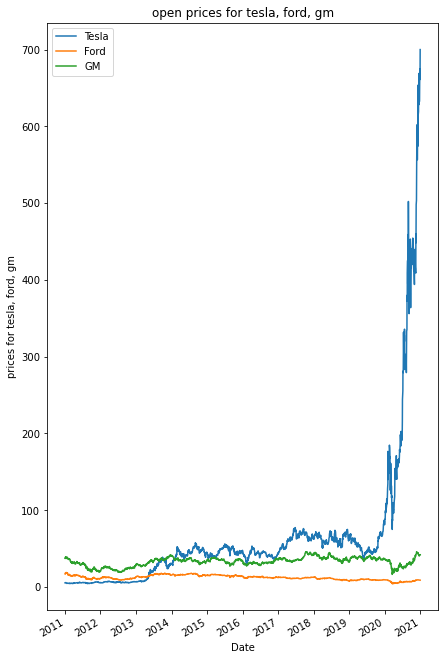

In [63]:
tesla['Open'].plot(figsize=(7,12), label= 'Tesla')
ford['Open'].plot(label = 'Ford')
gm['Open'].plot(label = 'GM')
plt.title('open prices for tesla, ford, gm')
plt.ylabel('prices for tesla, ford, gm')
plt.legend()

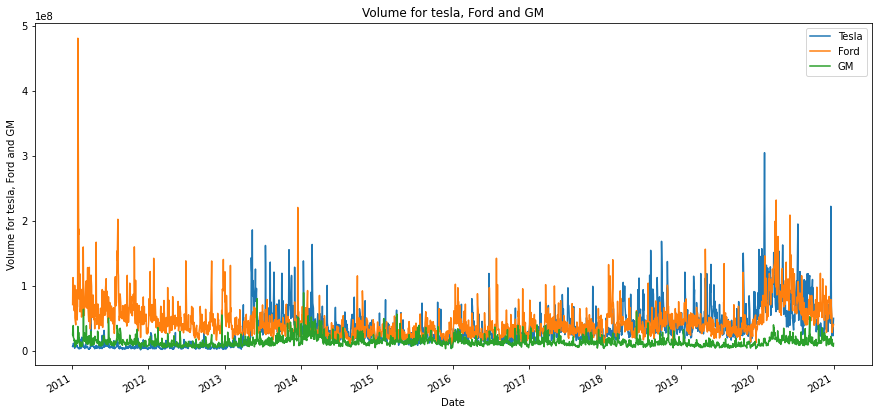

In [65]:
tesla['Volume'].plot(figsize=(15,7), label= 'Tesla')
ford['Volume'].plot(label = 'Ford')
gm['Volume'].plot(label = 'GM')
plt.title('Volume for tesla, Ford and GM')
plt.ylabel('Volume traded for tesla, Ford and GM')
plt.legend()

In [69]:
ford.iloc[[ford['Volume'].argmax()]]
#biggest profit since 99

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-28,17.879999,15.98,17.790001,16.27,480879500.0,11.029012


In [80]:
ford.iloc[10:15]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-18,18.770000,18.610001,18.660000,18.700001,39737500.0,12.676250
2011-01-19,18.719999,17.770000,18.709999,17.900000,89216500.0,12.133947
2011-01-20,18.000000,17.350000,17.770000,17.780001,93501600.0,12.052600
2011-01-21,18.110001,17.870001,17.990000,17.950001,48717700.0,12.167841
2011-01-24,18.030001,17.750000,18.030001,17.930000,51698600.0,12.154286


In [81]:
tesla['Total traded'] = tesla['Open'] * tesla['Volume']
ford['Total traded'] = ford['Open'] * ford['Volume']
gm['Total traded'] = gm['Open'] * gm['Volume']


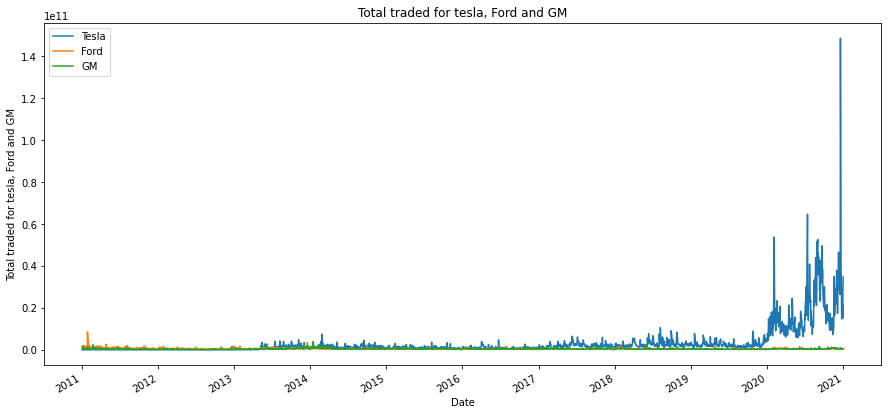

In [86]:
tesla['Total traded'].plot(figsize=(15,7), label= 'Tesla')
ford['Total traded'].plot(label = 'Ford')
gm['Total traded'].plot(label = 'GM')
plt.title('Total traded for tesla, Ford and GM')
plt.ylabel('Total traded for tesla, Ford and GM')
plt.legend()

In [88]:
tesla['Total traded'].argmax()

2508

In [89]:
tesla.iloc[[tesla['Total traded'].argmax()]]

,High,Low,Open,Close,Volume,Adj Close,Total traded
Date,,,,,,,
2020-12-18,695.0,628.539978,668.900024,695.0,222126200.0,695.0,1.485802e+11


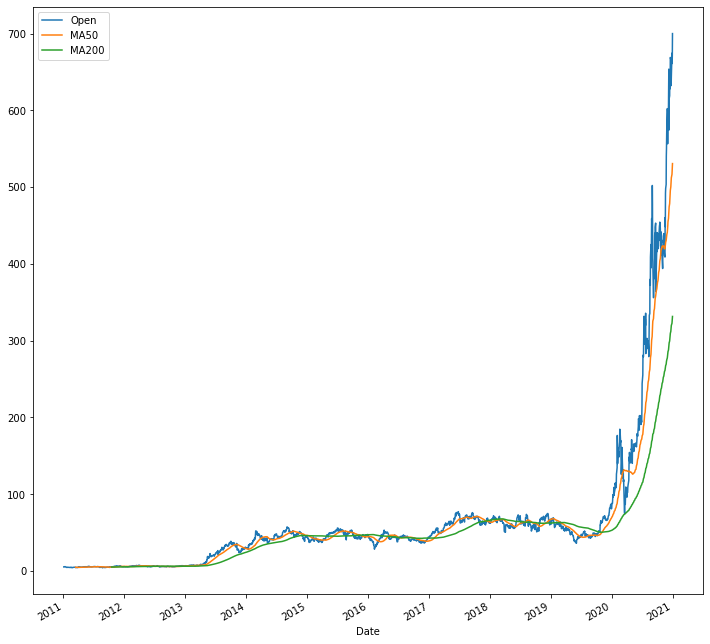

In [95]:
tesla['Open'].plot(figsize=(12,12))
tesla['MA50'] = tesla['Open'].rolling(50).mean()
tesla['MA200'] = tesla['Open'].rolling(200).mean()
tesla['MA50'].plot(label = 'MA50')
tesla['MA200'].plot(label = 'MA200')
plt.legend()

In [99]:
import pandas as pd
from pandas.plotting import scatter_matrix

In [110]:
car_comp = pd.concat([tesla['Open'],ford['Open'],gm['Open']], axis =1)
car_comp.columns =['Tesla Open', 'Ford Open', 'GM Open']
    

array([[<AxesSubplot:xlabel='Tesla Open', ylabel='Tesla Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='Tesla Open'>,
        <AxesSubplot:xlabel='GM Open', ylabel='Tesla Open'>],
       [<AxesSubplot:xlabel='Tesla Open', ylabel='Ford Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='Ford Open'>,
        <AxesSubplot:xlabel='GM Open', ylabel='Ford Open'>],
       [<AxesSubplot:xlabel='Tesla Open', ylabel='GM Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='GM Open'>,
        <AxesSubplot:xlabel='GM Open', ylabel='GM Open'>]], dtype=object)

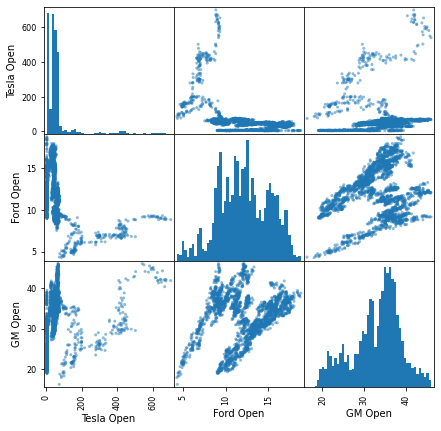

In [112]:
scatter_matrix(car_comp, figsize = (7,7), hist_kwds = {'bins':50})

In [123]:
from mpl_finance import *

ModuleNotFoundError: No module named 'mpl_finance'

In [129]:
#check volatility with daily percantage return
tesla['Returns'] = (tesla['Close']/ tesla['Close'].shift(1)) - 1
ford['Returns'] = (ford['Close']/ ford['Close'].shift(1)) - 1
gm['Returns'] = (gm['Close']/ gm['Close'].shift(1)) - 1



<AxesSubplot:>

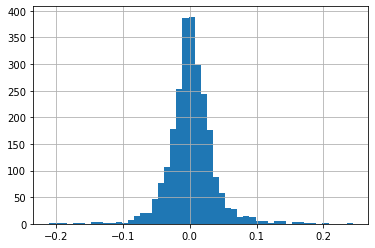

In [128]:
tesla['Returns'] .hist(bins=50)

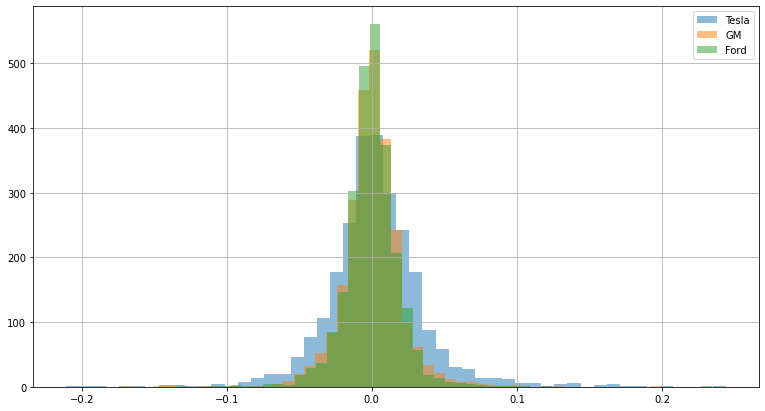

In [134]:
tesla['Returns'].hist(bins=50, label = 'Tesla', figsize=(13,7), alpha = 0.5)
gm['Returns'].hist(bins=50, label = 'GM',alpha = 0.5)
ford['Returns'].hist(bins=50, label = 'Ford',alpha = 0.5)
plt.legend()

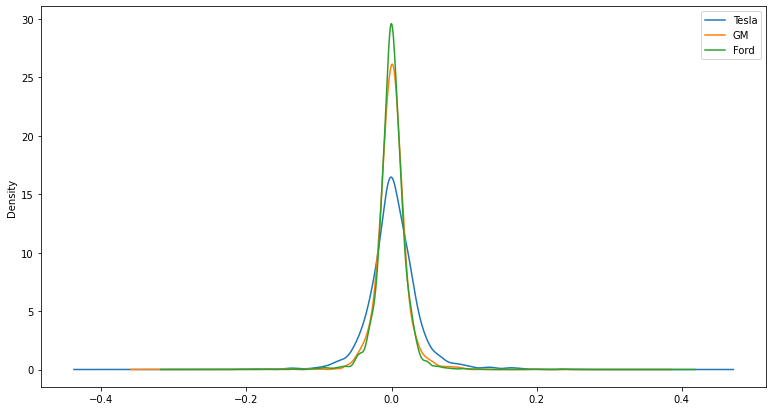

In [138]:
tesla['Returns'].plot(kind = 'kde', label = 'Tesla', figsize=(13,7))
gm['Returns'].plot(kind = 'kde', label = 'GM')
ford['Returns'].plot(kind = 'kde',  label = 'Ford')
plt.legend()

<AxesSubplot:>

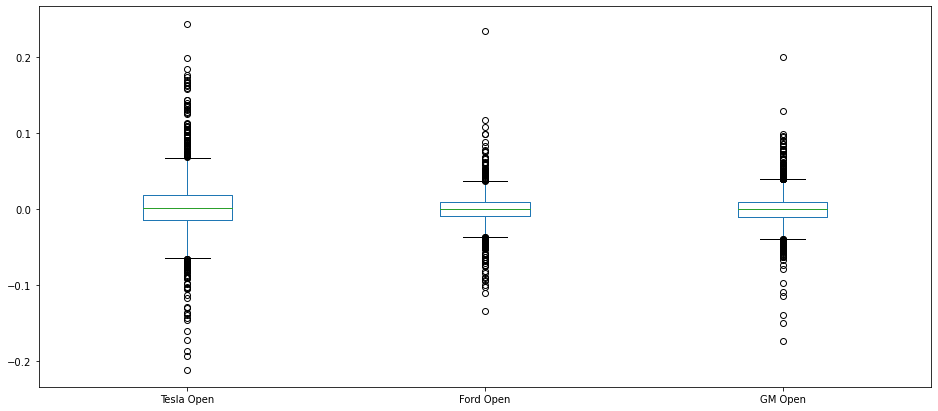

In [144]:
box_df = pd.concat([tesla['Returns'],ford['Returns'],gm['Returns']], axis =1)
box_df.columns =['Tesla Open', 'Ford Open', 'GM Open']
box_df.plot(kind = 'box', figsize = (16,7))

array([[<AxesSubplot:xlabel='Tesla Open', ylabel='Tesla Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='Tesla Open'>,
        <AxesSubplot:xlabel='GM Open', ylabel='Tesla Open'>],
       [<AxesSubplot:xlabel='Tesla Open', ylabel='Ford Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='Ford Open'>,
        <AxesSubplot:xlabel='GM Open', ylabel='Ford Open'>],
       [<AxesSubplot:xlabel='Tesla Open', ylabel='GM Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='GM Open'>,
        <AxesSubplot:xlabel='GM Open', ylabel='GM Open'>]], dtype=object)

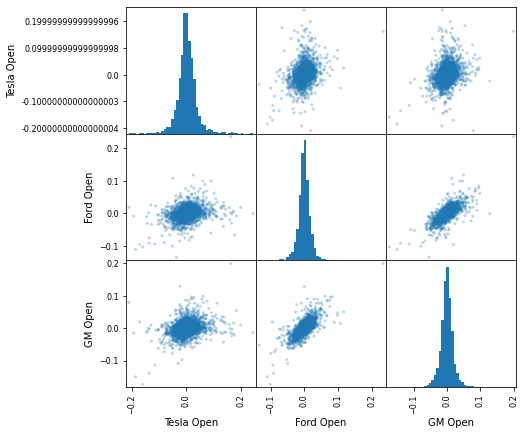

In [146]:
scatter_matrix(box_df, figsize = (7,7), hist_kwds = {'bins':50} , alpha = 0.3)

In [149]:
tesla['Cumilative returns'] = (1+tesla['Returns']).cumprod()
ford['Cumilative returns'] = (1+ford['Returns']).cumprod()
gm['Cumilative returns'] = (1+gm['Returns']).cumprod()
tesla

,High,Low,Open,Close,Volume,Adj Close,Total traded,MA50,MA200,Returns,Cumilative returns
Date,,,,,,,,,,,
2011-01-03,5.400000,5.180000,5.36800,5.324000,6415000.0,5.324000,3.443572e+07,NaN,NaN,NaN,NaN
2011-01-04,5.390000,5.204000,5.33200,5.334000,5937000.0,5.334000,3.165608e+07,NaN,NaN,0.001878,1.001878
2011-01-05,5.380000,5.238000,5.29600,5.366000,7233500.0,5.366000,3.830862e+07,NaN,NaN,0.005999,1.007889
2011-01-06,5.600000,5.362000,5.36600,5.576000,10306000.0,5.576000,5.530200e+07,NaN,NaN,0.039135,1.047333
2011-01-07,5.716000,5.580000,5.60000,5.648000,11239500.0,5.648000,6.294120e+07,NaN,NaN,0.012912,1.060856
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,666.090027,641.000000,642.98999,661.770020,22865600.0,661.770020,1.470235e+10,512.179603,319.920481,0.024444,124.299405
2020-12-28,681.400024,660.799988,674.51001,663.690002,32278600.0,663.690002,2.177224e+10,516.663603,322.698031,0.002901,124.660033
2020-12-29,669.900024,655.000000,661.00000,665.989990,22910800.0,665.989990,1.514404e+10,520.794803,325.533531,0.003465,125.092037


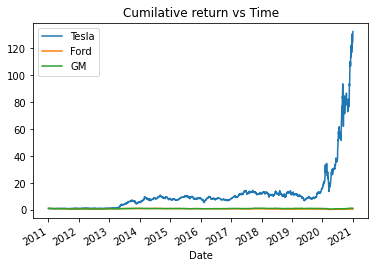

In [152]:
tesla['Cumilative returns'].plot(label = 'Tesla')
ford['Cumilative returns'].plot(label = 'Ford')
gm['Cumilative returns'].plot(label = 'GM')
plt.title('Cumilative return vs Time')
plt.legend()